![imagen](./attack%20on%20titan.jpg)

## ANALISIS EXPLORATORIO - LA POPULARIDAD DEL ANIME 

### TEMA

El objetivo de este EDA es entender mejor lo que resuena con la audiencia y contribuye a la popularidad en el mundo del anime

### HIPÓTESIS

1.¿Que series de animes tienen mas popularidad?

2.¿Que genero de anime es el mas popular?

3.¿La popularidad del anime podría estar relacionada con el estudio de animacion?

4.¿Los animes cortos tienen mas popularidad que los animes largos?

5.¿Que estudios de animacion son los mas populares?

6.¿La participación de seiyuus conocidos podría relacionarse positivamente con la popularidad de un anime?

7.¿Cuantos animes han sido cancelados y cuantos han sido finalizados?

8.¿Que pelicula de Studio Ghibli tiene mas popularidad?

9.¿Cuantos animes han sido premiados?

10.¿Que peliculas de anime son las mas populares?

## OBTENCIÓN DE LOS DATOS

### DATASETS Y FUENTES ALTERNATIVAS DE DATOS

**LINK de la base de datos que voy a usar en este EDA:**
>[KAGGLE- ANIME](https://www.kaggle.com/datasets/hernan4444/anime-recommendation-database-2020)

>[KAGGLE- ANIME2](https://www.kaggle.com/datasets/vishalmane10/anime-dataset-2022)

>[Myanimelist API](https://myanimelist.net/apiconfig)

>[Kitsu API](https://kitsu.docs.apiary.io/#)

>[Anilist API](https://anilist.gitbook.io/anilist-apiv2-docs/)

>[RapidAPI](https://rapidapi.com/search/anime)

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns

In [6]:
anime = pd.read_csv("./Anime3.csv")
anime.head(2)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.6,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."


In [7]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18495 entries, 0 to 18494
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Rank             18495 non-null  int64  
 1   Name             18495 non-null  object 
 2   Japanese_name    7938 non-null   object 
 3   Type             18495 non-null  object 
 4   Episodes         9501 non-null   float64
 5   Studio           12018 non-null  object 
 6   Release_season   4116 non-null   object 
 7   Tags             18095 non-null  object 
 8   Rating           15364 non-null  float64
 9   Release_year     18112 non-null  float64
 10  End_year         2854 non-null   float64
 11  Description      18491 non-null  object 
 12  Content_Warning  1840 non-null   object 
 13  Related_Mange    7627 non-null   object 
 14  Related_anime    10063 non-null  object 
 15  Voice_actors     15309 non-null  object 
 16  staff            13005 non-null  object 
dtypes: float64(4

In [8]:
anime.describe()

,Rank,Episodes,Rating,Release_year,End_year
count,18495.00000,9501.000000,15364.000000,18112.000000,2854.000000
mean,9248.00000,20.920850,3.355133,2006.520318,2004.256132
std,5339.19095,37.990858,0.400624,15.189537,13.257484
min,1.00000,1.000000,0.960000,1907.000000,1962.000000
25%,4624.50000,2.000000,3.130000,2001.000000,1996.000000
50%,9248.00000,12.000000,3.360000,2012.000000,2007.000000
75%,13871.50000,26.000000,3.590000,2017.000000,2015.000000
max,18495.00000,800.000000,4.600000,2023.000000,2022.000000


Manejo de datos faltantes

In [9]:
#que tipo de datos
anime.dtypes

Rank                 int64
Name                object
Japanese_name       object
Type                object
Episodes           float64
Studio              object
Release_season      object
Tags                object
Rating             float64
Release_year       float64
End_year           float64
Description         object
Content_Warning     object
Related_Mange       object
Related_anime       object
Voice_actors        object
staff               object
dtype: object

In [10]:
#cuantas variables
anime.dtypes.value_counts()

object     12
float64     4
int64       1
Name: count, dtype: int64

In [11]:
#cuantas filas y columnas
anime.shape

(18495, 17)

## Limpieza de la base de datos

- Ver si tengo valores nulos

In [12]:
anime.isna().any()

Rank               False
Name               False
Japanese_name       True
Type               False
Episodes            True
Studio              True
Release_season      True
Tags                True
Rating              True
Release_year        True
End_year            True
Description         True
Content_Warning     True
Related_Mange       True
Related_anime       True
Voice_actors        True
staff               True
dtype: bool

- Ver cuantos valores nulos tengo

In [13]:
anime.isnull().sum()

Rank                   0
Name                   0
Japanese_name      10557
Type                   0
Episodes            8994
Studio              6477
Release_season     14379
Tags                 400
Rating              3131
Release_year         383
End_year           15641
Description            4
Content_Warning    16655
Related_Mange      10868
Related_anime       8432
Voice_actors        3186
staff               5490
dtype: int64

- Cuantos valores nulos tengo en total

In [23]:
anime.isnull().sum().sum()

104597

- Ver la proporcion de valores nulos

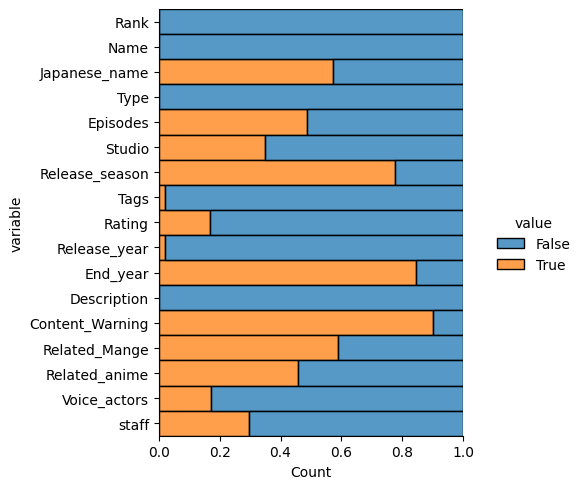

In [25]:
anime.isnull().melt().pipe(lambda df:(sns.displot(data = df, y="variable", hue = "value",multiple = "fill")));

- Cuantos valores duplicados tengo en la columna Name

In [21]:
anime["Name"].duplicated().sum()

52

- Encontrar filas duplicadas en la columna Name

In [26]:
anime[anime.duplicated(subset='Name', keep=False)]
duplicates[['Name']]

,Name
2998,[email protected]
3036,[email protected]
3989,Genki! Genki! Nontan: Spoon Tan Tan Tan
3991,Genki! Genki! Nontan: Spoon Tan Tan Tan
4339,Bai Gui Youeryuan 3rd Season
...,...
10532,"Kamaishi no ""Kiseki"": Inochi wo Mamoru Tokubet..."
10533,Mimizu Monogatari
10534,tio: Sun
11750,[email protected]


- Borrar duplicados

In [67]:
anime_sinduplicados = anime.drop_duplicates(subset='Name', keep='first')

anime_sinduplicados.head(3)

,Rank,Name,Japanese_name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Description,Content_Warning,Related_Mange,Related_anime,Voice_actors,staff
0,1,Demon Slayer: Kimetsu no Yaiba - Entertainment...,Kimetsu no Yaiba: Yuukaku-hen,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.60,2021.0,NaN,'Tanjiro and his friends accompany the Hashira...,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk...","Koyoharu Gotouge : Original Creator, Haruo Sot..."
1,2,Fruits Basket the Final Season,Fruits Basket the Final,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.60,2021.0,NaN,'The final arc of Fruits Basket.',"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum...","Natsuki Takaya : Original Creator, Yoshihide I..."
2,3,Mo Dao Zu Shi 3,The Founder of Diabolism 3,Web,12.0,B.C MAY PICTURES,NaN,"Fantasy, Ancient China, Chinese Animation, Cul...",4.58,2021.0,NaN,'The third season of Mo Dao Zu Shi.',NaN,Grandmaster of Demonic Cultivation: Mo Dao Zu ...,"Mo Dao Zu Shi 2, Mo Dao Zu Shi Q","Lan Wangji, Wei Wuxian, Jiang Cheng, Jin Guang...","Mo Xiang Tong Xiu : Original Creator, Xiong Ke..."


In [55]:
anime_sinduplicados["Name"].duplicated().sum()

0

In [56]:
anime_sinduplicados.shape

(18443, 17)

In [57]:
anime_sinduplicados.isnull().sum()

Rank                   0
Name                   0
Japanese_name      10527
Type                   0
Episodes            8971
Studio              6452
Release_season     14336
Tags                 396
Rating              3131
Release_year         383
End_year           15598
Description            4
Content_Warning    16608
Related_Mange      10834
Related_anime       8407
Voice_actors        3171
staff               5470
dtype: int64

In [58]:
anime_sinduplicados.isnull().sum().sum()

104288

In [59]:
anime_copia = anime_sinduplicados.copy()

- Eliminar columnas que no me interesan

In [60]:
anime_copia.drop('staff', axis=1, inplace=True)

In [61]:
anime_copia.drop('Japanese_name', axis=1, inplace=True)

In [63]:
anime_copia.drop('Rank', axis=1, inplace=True)

In [72]:
anime_copia.drop('Description', axis=1, inplace=True)

In [74]:
anime_copia.head(2)

,Name,Type,Episodes,Studio,Release_season,Tags,Rating,Release_year,End_year,Content_Warning,Related_Mange,Related_anime,Voice_actors
0,Demon Slayer: Kimetsu no Yaiba - Entertainment...,TV,NaN,ufotable,Fall,"Action, Adventure, Fantasy, Shounen, Demons, H...",4.6,2021.0,NaN,Explicit Violence,Demon Slayer: Kimetsu no Yaiba,"Demon Slayer: Kimetsu no Yaiba, Demon Slayer: ...","Inosuke Hashibira : Yoshitsugu Matsuoka, Nezuk..."
1,Fruits Basket the Final Season,TV,13.0,TMS Entertainment,Spring,"Drama, Fantasy, Romance, Shoujo, Animal Transf...",4.6,2021.0,NaN,"Emotional Abuse,, Mature Themes,, Physical Abu...","Fruits Basket, Fruits Basket Another","Fruits Basket 1st Season, Fruits Basket 2nd Se...","Akito Sohma : Maaya Sakamoto, Kyo Sohma : Yuum..."


- Cambiar el nombre de la columna tags por generos

In [75]:
anime_copia.rename(columns={'Tags': 'Genres'}, inplace=True)